In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#
na_val = ['#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', 
          '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan',
        'null']
train_df = pd.read_csv('train.csv', encoding='iso-8859-1', na_values=na_val)
train_df.shape

(42000, 785)

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [10]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
#Data looks evenly distributed for label. As upto 50% has 0 to 4 as label and rest 50% has 5 to 9.

In [5]:
#check for missing data
train_df.columns[(train_df.isnull().sum()/len(train_df)) >0.00]

Index([], dtype='object')

In [ ]:
#looks like there are no missing value in any of the column.

In [6]:
#lets check for duplicate rows in our dataset
train_df[train_df.duplicated()]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783


In [ ]:
#There are no dupliacte records in our dataset

In [ ]:
#lets now check if there is any data imbalance in our dataset
#i.e. if each label has same number of records or not

In [7]:
train_df.groupby('label').count()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,4132,4132,4132,4132,4132,4132,4132,4132,4132,4132,...,4132,4132,4132,4132,4132,4132,4132,4132,4132,4132
1,4684,4684,4684,4684,4684,4684,4684,4684,4684,4684,...,4684,4684,4684,4684,4684,4684,4684,4684,4684,4684
2,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177,...,4177,4177,4177,4177,4177,4177,4177,4177,4177,4177
3,4351,4351,4351,4351,4351,4351,4351,4351,4351,4351,...,4351,4351,4351,4351,4351,4351,4351,4351,4351,4351
4,4072,4072,4072,4072,4072,4072,4072,4072,4072,4072,...,4072,4072,4072,4072,4072,4072,4072,4072,4072,4072
5,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795,...,3795,3795,3795,3795,3795,3795,3795,3795,3795,3795
6,4137,4137,4137,4137,4137,4137,4137,4137,4137,4137,...,4137,4137,4137,4137,4137,4137,4137,4137,4137,4137
7,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,...,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401
8,4063,4063,4063,4063,4063,4063,4063,4063,4063,4063,...,4063,4063,4063,4063,4063,4063,4063,4063,4063,4063


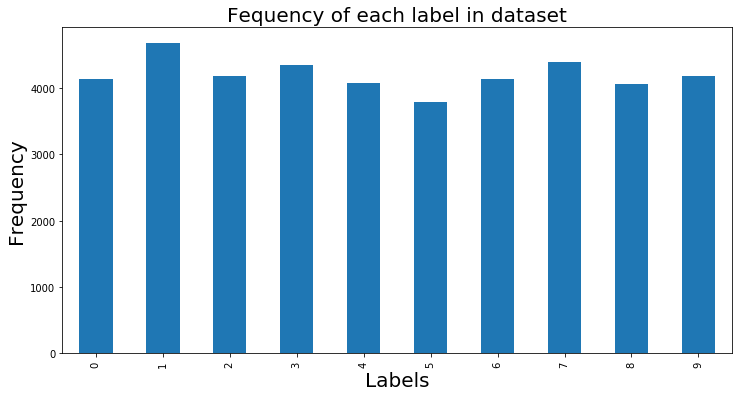

In [56]:
plt.figure(figsize=(12,6))
train_df.groupby('label').count()['pixel0'].plot(kind='bar')
plt.xlabel('Labels',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.title('Fequency of each label in dataset',fontsize=20)
plt.show()

In [ ]:
#I see that there are alomost similar number of records for each label in our dataset

In [ ]:
#Lets now go for logistic dataset

In [ ]:
#Model Building

In [8]:
df = train_df.copy() #create a backup of our dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [88]:
#I see that label is considered a field with int datatype but as per our problem statement,
#we need to classify each dataset
#so, we will convert label to object type

#df['label']=df['label'].astype('object')

In [10]:
#Lets now create X and Y for our model 
y_train=df.pop('label')
X_train=df
#Now as all our pixels are in binary format, so there is no need of scaling

In [11]:
#lets create a model first using logistic regression
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [12]:
logisticRegr.fit(X_train,y_train)

C:\Users\vpapn\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vpapn\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\vpapn\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\vpapn\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\vpapn\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: Co

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
y_pred = logisticRegr.predict(X_train)


In [21]:
predictions = pd.DataFrame(y_pred,columns=['y_pred'])
predictions.head()

,y_pred
0,1
1,0
2,1
3,4
4,0


In [24]:
predictions['y_train']=y_train
predictions.head()

,y_pred,y_train
0,1,1
1,0,0
2,1,1
3,4,4
4,0,0


In [134]:
X_test = pd.read_csv('test.csv', encoding='iso-8859-1')
y_test_pred = logisticRegr.predict(X_test)
result_df_log_reg = pd.DataFrame(predictions.index+1,columns=['ImageId'])
result_df_log_reg=result_df_log_reg[result_df_log_reg['ImageId']<=28000]
result_df_log_reg['Label']=y_test_pred

In [135]:
result_df_log_reg.to_csv('Result_Digit_Recognition_v2.csv',index=False)

In [47]:
from sklearn import metrics
accuracy = metrics.accuracy_score(predictions.y_train,predictions.y_pred)
accuracy

0.9310238095238095

In [32]:
from sklearn.metrics import precision_score, recall_score

In [38]:
recall_score(predictions.y_train,predictions.y_pred,average=None)

array([0.98136496, 0.98057216, 0.91165909, 0.90921627, 0.93737721,
       0.87088274, 0.97051003, 0.94001363, 0.89367462, 0.90401146])

In [41]:
precision_score(predictions.y_train,predictions.y_pred,average='micro')

0.9310238095238095

In [48]:
#Dimension Reduction using PCA
from sklearn.decomposition import PCA

In [49]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [50]:
pca.components_

array([[-3.57976081e-19, -5.55111512e-17, -1.11022302e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-5.15181155e-19, -1.11022302e-16,  1.11022302e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.57308707e-19, -4.16333634e-17,  4.16333634e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 0.00000000e+00,  4.63070215e-01, -4.38191610e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.59294752e-02, -3.38213122e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.29549098e-01,  2.55254912e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [51]:
pca.explained_variance_ratio_

array([9.74893769e-02, 7.16026628e-02, 6.14590336e-02, 5.37930200e-02,
       4.89426213e-02, 4.30321399e-02, 3.27705076e-02, 2.89210317e-02,
       2.76690235e-02, 2.34887103e-02, 2.09932543e-02, 2.05900116e-02,
       1.70255350e-02, 1.69278702e-02, 1.58112641e-02, 1.48323962e-02,
       1.31968789e-02, 1.28272708e-02, 1.18797614e-02, 1.15275473e-02,
       1.07219122e-02, 1.01519930e-02, 9.64902259e-03, 9.12846068e-03,
       8.87640859e-03, 8.38766308e-03, 8.11855855e-03, 7.77405747e-03,
       7.40635116e-03, 6.86661489e-03, 6.57982211e-03, 6.38798611e-03,
       5.99367016e-03, 5.88913410e-03, 5.64335178e-03, 5.40967048e-03,
       5.09221943e-03, 4.87504936e-03, 4.75569422e-03, 4.66544724e-03,
       4.52952464e-03, 4.44989164e-03, 4.18255277e-03, 3.97505755e-03,
       3.84541993e-03, 3.74919479e-03, 3.61013219e-03, 3.48522166e-03,
       3.36487802e-03, 3.20738135e-03, 3.15467117e-03, 3.09145543e-03,
       2.93709181e-03, 2.86541339e-03, 2.80759437e-03, 2.69618435e-03,
      

In [52]:
#lets make a scree plot for explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

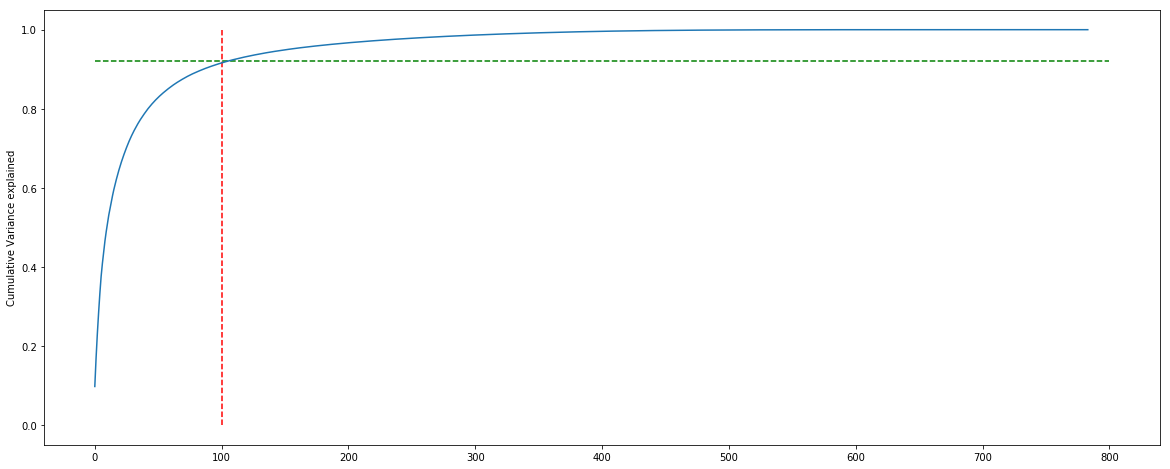

In [98]:
plt.figure(figsize=(20,8))
plt.vlines(x=100, ymax=1, ymin=0, colors='r', linestyle='--')
plt.hlines(y=0.92, xmax=800, xmin=0, colors='g', linestyle='--')
plt.plot(var_cumu)
plt.ylabel('Cumulative Variance explained')
plt.show()

In [100]:
#I see that optimal number of components shoud be 150.
#Perform PCA with 100 components

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=100)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(42000, 100)

In [109]:
test_df = pd.read_csv('test.csv', encoding='iso-8859-1')
df_test_pca = pca_final.transform(test_df)
df_test_pca.shape

(28000, 100)

In [101]:
#lets now again create logistic regresison model using our principle components
logisticRegr_pca = LogisticRegression(solver = 'lbfgs')

In [104]:
pca_model = logisticRegr_pca.fit(df_train_pca,y_train)

C:\Users\vpapn\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\vpapn\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\vpapn\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\vpapn\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\vpapn\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: Co

In [105]:
y_pred_pca = pca_model.predict(df_train_pca)

In [106]:
predictions = pd.DataFrame(y_pred_pca,columns=['y_pred_pca'])
predictions['y_train'] = y_train
predictions.head()

,y_pred_pca,y_train
0,1,1
1,0,0
2,1,1
3,4,4
4,0,0


In [107]:
accuracy_pca = metrics.accuracy_score(predictions.y_train,predictions.y_pred_pca)
accuracy_pca

0.913047619047619

In [108]:
recall_score(predictions.y_train,predictions.y_pred_pca,average=None)

array([0.97483059, 0.97608881, 0.88700024, 0.88025741, 0.92681729,
       0.8400527 , 0.96156635, 0.93069757, 0.8631553 , 0.87631328])

In [110]:
y_pred_test = pca_model.predict(df_test_pca)

In [121]:
result_df = pd.DataFrame(predictions.index+1,columns=['ImageId'])
result_df=result_df[result_df['ImageId']<=28000]
result_df['Label']=y_pred_test

In [124]:
result_df.groupby('Label').count()
result_df.drop_index

,ImageId
Label,
0,2833
1,3309
2,2753
3,2749
4,2782
5,2384
6,2804
7,2943
8,2696


In [132]:
result_df.to_csv('Result_Digit_Recognition.csv',index=False)